In [1]:
#upgrade packages
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 7.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
#import this and that
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import statsmodels.api as sm
import matplotlib.pyplot as plt

**Question 1**

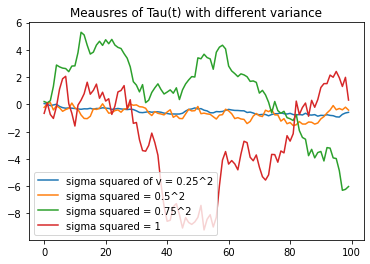

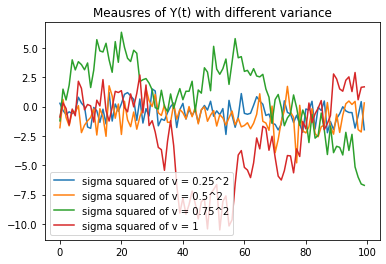

In [18]:
#generate data for experiments
#set seed for replication purposes
np.random.seed(19)

#set mu and sigma for each dataset
obs = 100
etamu = 0
etasig = 1
vmu = 0
vsig1 = 0.25*0.25
vsig2 = 0.5*0.5
vsig3 = 0.75*0.75
vsig4 = 1
#x for plotting
x=np.linspace(1,100)

#generate white noise matricies, stack 4 different vsig results
eta1 = np.random.normal(etamu, etasig, obs)
eta2 = np.random.normal(etamu, etasig, obs)
eta3 = np.random.normal(etamu, etasig, obs)
eta4 = np.random.normal(etamu, etasig, obs)
v1 = np.random.normal(vmu, vsig1, obs)
v2 = np.random.normal(vmu, vsig2, obs)
v3 = np.random.normal(vmu, vsig3, obs)
v4 = np.random.normal(vmu, vsig4, obs)

#generate tau
tau1 = np.zeros(obs)
tau1[0] = v1[0]
tau2 = np.zeros(obs)
tau2[0] = v2[0]
tau3 = np.zeros(obs)
tau3[0] = v3[0]
tau4 = np.zeros(obs)
tau4[0] = v4[0]

for i in range(1,obs):
    tau1[i]=tau1[i-1]+v1[i]
for i in range(1,obs):
    tau2[i]=tau2[i-1]+v2[i]
for i in range(1,obs):
    tau3[i]=tau3[i-1]+v3[i]
for i in range(1,obs):
    tau4[i]=tau4[i-1]+v4[i]

#generate y
y1 = np.zeros(obs)
y2 = np.zeros(obs)
y3 = np.zeros(obs)
y4 = np.zeros(obs)

for i in range(0,obs):
    y1[i] = tau1[i] + eta1[i]
for i in range(0,obs):
    y2[i] = tau2[i] + eta2[i]
for i in range(0,obs):
    y3[i] = tau3[i] + eta3[i]
for i in range(0,obs):
    y4[i] = tau4[i] + eta4[i]

# plot tau's
plt.plot(tau1, label = 'sigma squared of v = 0.25^2')
plt.plot(tau2, label = 'sigma squared = 0.5^2')
plt.plot(tau3, label = 'sigma squared = 0.75^2')
plt.plot(tau4, label = 'sigma squared = 1')
plt.title('Meausres of Tau(t) with different variance')
plt.legend()
plt.show()

#plot y's
plt.plot(y1, label = 'sigma squared of v = 0.25^2')
plt.plot(y2, label = 'sigma squared of v = 0.5^2')
plt.plot(y3, label = 'sigma squared of v = 0.75^2')
plt.plot(y4, label = 'sigma squared of v = 1')
plt.title('Meausres of Y(t) with different variance')
plt.legend()
plt.show()

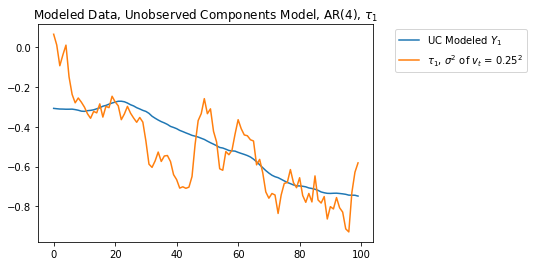

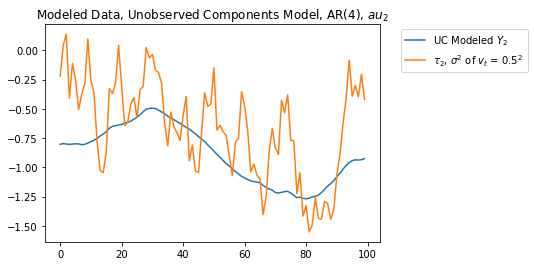

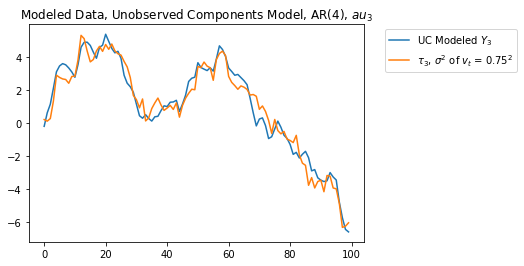

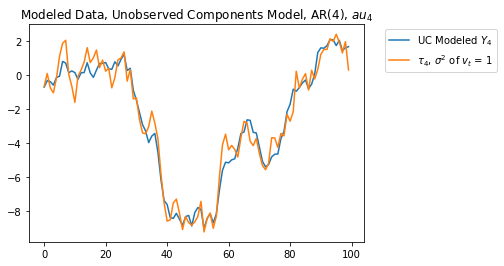

In [28]:
#estimate the unobserved components model via maximum likelihood
y1_unobscomp_mod = sm.tsa.UnobservedComponents(y1, 'rwalk', autoregressive=4)
y1_unobscomp_res = y1_unobscomp_mod.fit(method='powell', disp=False)
#print(y1_unobscomp_res.summary())
y2_unobscomp_mod = sm.tsa.UnobservedComponents(y2, 'rwalk', autoregressive=4)
y2_unobscomp_res = y2_unobscomp_mod.fit(method='powell', disp=False)
#print(y1_unobscomp_res.summary())
y3_unobscomp_mod = sm.tsa.UnobservedComponents(y3, 'rwalk', autoregressive=4)
y3_unobscomp_res = y3_unobscomp_mod.fit(method='powell', disp=False)
#print(y1_unobscomp_res.summary())
y4_unobscomp_mod = sm.tsa.UnobservedComponents(y4, 'rwalk', autoregressive=4)
y4_unobscomp_res = y4_unobscomp_mod.fit(method='powell', disp=False)
#print(y1_unobscomp_res.summary())


plt.plot(y1_unobscomp_res.level.smoothed, label = r'UC Modeled $Y_1$')
plt.plot(tau1, label = r'$\tau_{1}$, $\sigma^2$ of $v_t$ = $0.25^2$')
plt.title(r'Modeled Data, Unobserved Components Model, AR(4), $\tau_{1}$')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

plt.plot(y2_unobscomp_res.level.smoothed, label = r'UC Modeled $Y_2$')
plt.plot(tau2, label = r'$\tau_{2}$, $\sigma^2$ of $v_t$ = $0.5^2$')
plt.title('Modeled Data, Unobserved Components Model, AR(4), $\tau_{2}$')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

plt.plot(y3_unobscomp_res.level.smoothed, label = r'UC Modeled $Y_3$')
plt.plot(tau3, label = r'$\tau_{3}$, $\sigma^2$ of $v_t$ = $0.75^2$')
plt.title('Modeled Data, Unobserved Components Model, AR(4), $\tau_{3}$')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

plt.plot(y4_unobscomp_res.level.smoothed, label = r'UC Modeled $Y_4$')
plt.plot(tau4, label = r'$\tau_{4}$, $\sigma^2$ of $v_t$ = 1')
plt.title('Modeled Data, Unobserved Components Model, AR(4), $\tau_{4}$')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

**Question 2**

In [4]:
# get quarterly CPI data to estimate inflation
start = '1960-01-01'
end = '2022-04-01'

def get_data_from_fred(start=start, end=end):
  cpi = (
      web.DataReader(['CPIAUCSL','PPIACO'], 'fred', start, end)
    .resample('QS')
    .mean()
 #   .pipe(pct_change_on_last_yr)
    .dropna()
  )

  fred_var = (
      cpi
      .dropna()
      .rename(columns=dict(
          CPIAUCSL = 'CPI',
          PPIACO = 'PPI'
      ))
  )

  return fred_var

fred_var = get_data_from_fred()

fred_var['log(CPI)']=np.log(fred_var['CPI'])
fred_var['log(CPI)diff'] = fred_var['log(CPI)'].diff(12)
fred_var['inflation_estimation_CPI'] = fred_var['log(CPI)diff']*100
fred_var['log(PPI)']=np.log(fred_var['PPI'])
fred_var['log(PPI)diff'] = fred_var['log(PPI)'].diff(12)
fred_var['inflation_estimation_PPI'] = fred_var['log(PPI)diff']*100

fred_var.dropna(subset = ['inflation_estimation_CPI'], inplace=True)
fred_var.dropna(subset = ['inflation_estimation_PPI'], inplace=True)
fred_var.index.freq = fred_var.index.inferred_freq
fred_var.head()

,CPI,PPI,log(CPI),log(CPI)diff,inflation_estimation_CPI,log(PPI),log(PPI)diff,inflation_estimation_PPI
DATE,,,,,,,,
1963-01-01,30.476667,31.533333,3.416961,0.036080,3.608007,3.451045,-0.004219,-0.421942
1963-04-01,30.533333,31.500000,3.418819,0.031946,3.194593,3.449988,-0.007380,-0.738011
1963-07-01,30.720000,31.633333,3.424914,0.037477,3.747744,3.454211,0.000000,0.000000
1963-10-01,30.803333,31.633333,3.427623,0.033786,3.378588,3.454211,-0.002105,-0.210526
1964-01-01,30.930000,31.666667,3.431727,0.035877,3.587681,3.455265,-0.004202,-0.420169


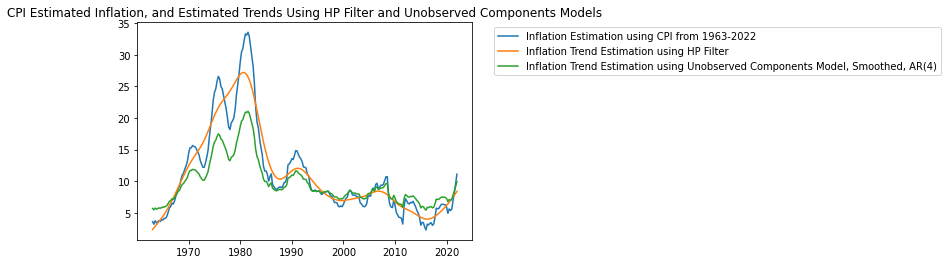

In [13]:
#Use HP Filter and UC Model to estimate inflation trends using CPI

#hp filter, lamda = 1600
hp_cycle_infl, hp_trend_infl = sm.tsa.filters.hpfilter(fred_var.inflation_estimation_CPI, lamb=1600)
infl_unobscomp_mod = sm.tsa.UnobservedComponents(fred_var.inflation_estimation_CPI, 'rwalk', autoregressive=1)
infl_unobscomp_res = infl_unobscomp_mod.fit(method='powell', disp=False)

plt.plot(fred_var.index, fred_var.inflation_estimation_CPI, label = 'Inflation Estimation using CPI from 1963-2022')
plt.plot(fred_var.index, hp_trend_infl, label = 'Inflation Trend Estimation using HP Filter')
plt.plot(fred_var.index, infl_unobscomp_res.level.smoothed, label = 'Inflation Trend Estimation using Unobserved Components Model, Smoothed, AR(4)')
plt.title('CPI Estimated Inflation, and Estimated Trends Using HP Filter and Unobserved Components Models')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

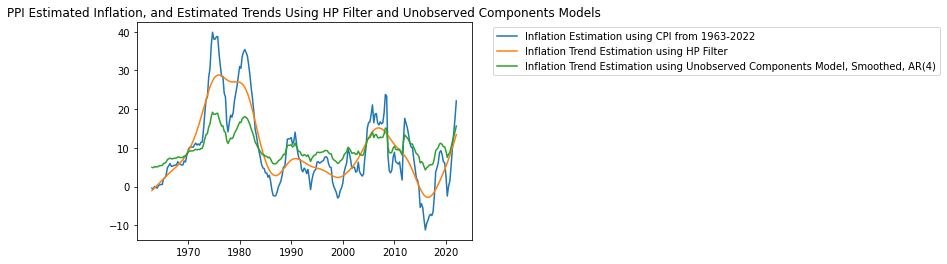

In [14]:
#Use HP Filter and UC Model to estimate inflation trends using PPI

#hp filter, lamda = 1600
hp_cycle_infl_PPI, hp_trend_infl_PPI = sm.tsa.filters.hpfilter(fred_var.inflation_estimation_PPI, lamb=1600)
infl_unobscomp_mod_PPI = sm.tsa.UnobservedComponents(fred_var.inflation_estimation_PPI, 'rwalk', autoregressive=1)
infl_unobscomp_res_PPI = infl_unobscomp_mod_PPI.fit(method='powell', disp=False)

plt.plot(fred_var.index, fred_var.inflation_estimation_PPI, label = 'Inflation Estimation using CPI from 1963-2022')
plt.plot(fred_var.index, hp_trend_infl_PPI, label = 'Inflation Trend Estimation using HP Filter')
plt.plot(fred_var.index, infl_unobscomp_res_PPI.level.smoothed, label = 'Inflation Trend Estimation using Unobserved Components Model, Smoothed, AR(4)')
plt.title('PPI Estimated Inflation, and Estimated Trends Using HP Filter and Unobserved Components Models')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In this example, it seems as though the HP filter does a pretty good job of smoothly estimating the inflation level, but the UC model captures does a better job capturing the volatility of inflation rates. I prefer the UC model, because inflation rates have been highly volatile since the early 1960's. Both estimates seem to predict an upward trend of infation in the near future. 